<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/notebooks/08_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

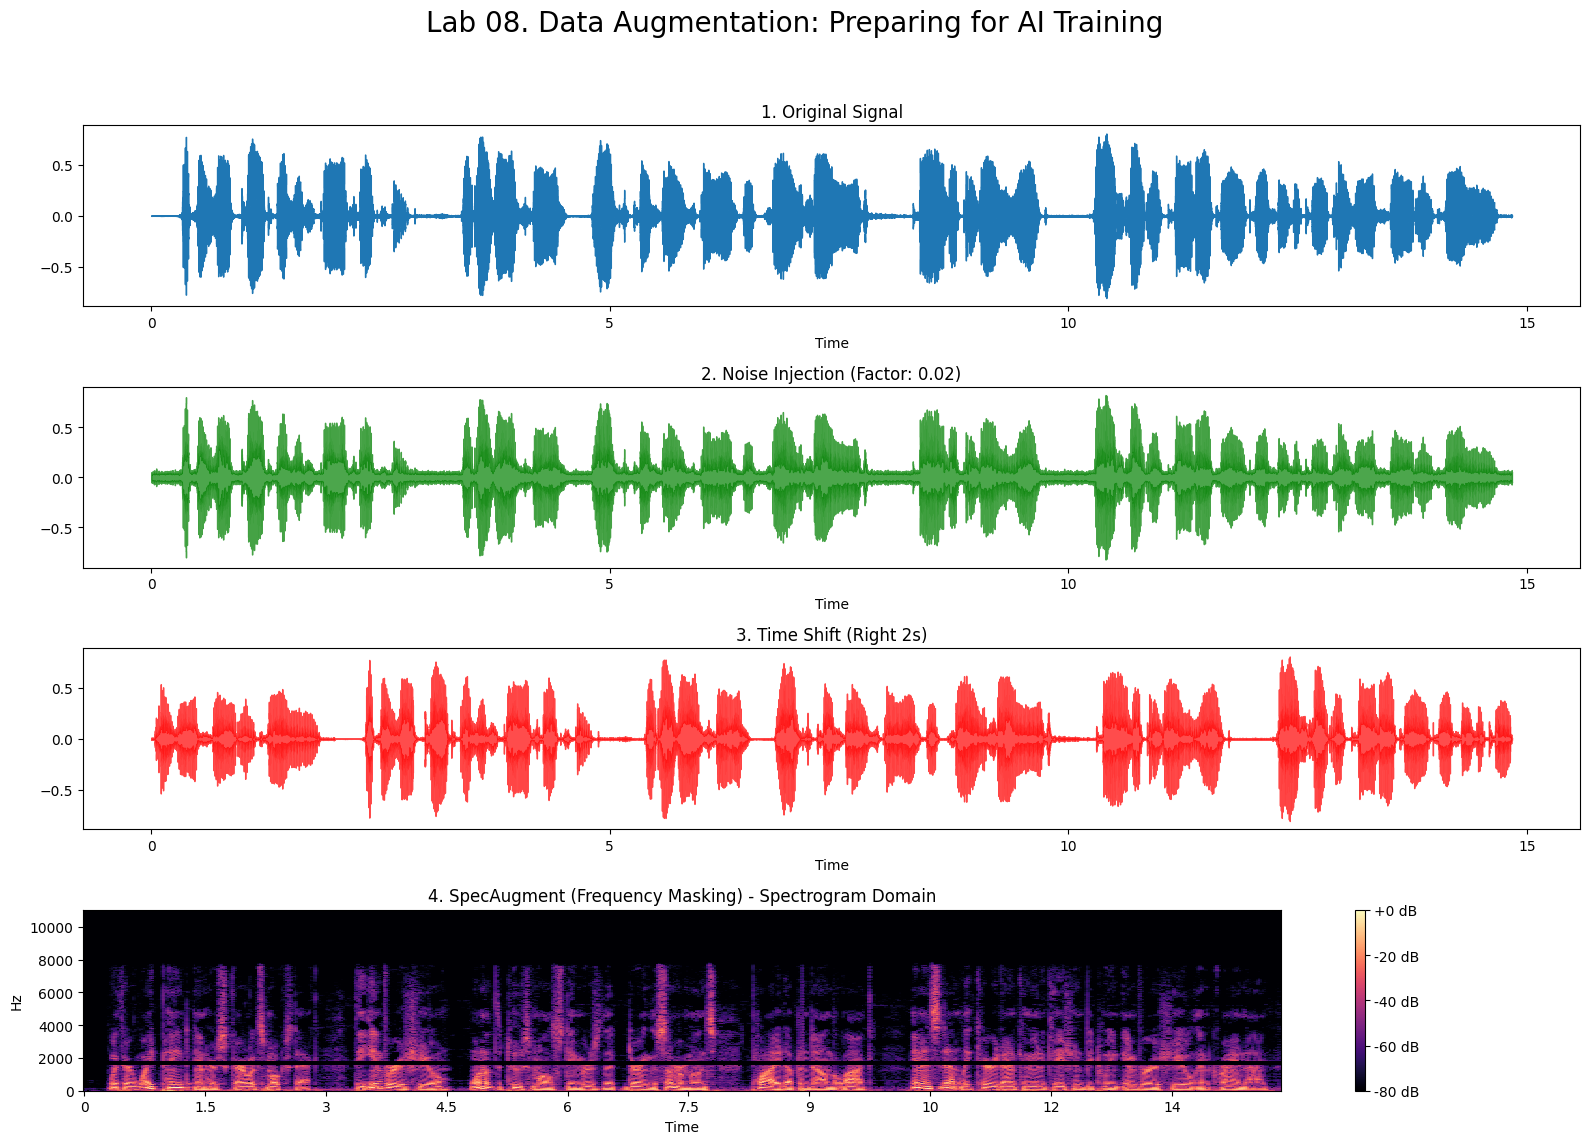

▶️ 1. Original Signal (원본):


▶️ 2. Noise Injection (지지직거림 추가):


▶️ 3. Time Shift (소리가 늦게 시작함):


In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# 1. 데이터 로드
filename = librosa.ex('libri1')
y, sr = librosa.load(filename)

# --- Augmentation 1: Noise Injection (노이즈 주입) ---
# 모델이 잡음 환경에서도 목소리를 잘 인식하도록 훈련하기 위함
noise_factor = 0.02
noise = np.random.normal(0, 1, len(y))
y_noise = y + noise_factor * noise

# --- Augmentation 2: Time Shifting (시간 이동) ---
# 소리의 시작 위치를 앞뒤로 밀어서, 모델이 위치에 상관없이 소리를 인식하게 함
# 여기서는 오른쪽으로 2초(sr * 2)만큼 이동(Roll)시킴
shift_amount = int(sr * 2.0)
y_shift = np.roll(y, shift_amount)

# --- Augmentation 3: SpecAugment (Frequency Masking) ---
# 스펙트로그램의 특정 주파수 대역을 지워버리는 기법 (최신 AI 트렌드)
# 특정 주파수 정보가 없어도 나머지 정보로 추론하는 능력을 키움
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# 주파수 축에서 10개 밴드만큼을 랜덤하게 마스킹(0으로 만듦)함
f_mask_start = np.random.randint(0, S_db.shape[0] - 20)
S_db_masked = S_db.copy()
S_db_masked[f_mask_start : f_mask_start + 20, :] = -80 # -80dB(거의 무음)로 처리

# 2. 결과 시각화
plt.figure(figsize=(16, 12))
plt.suptitle('Lab 08. Data Augmentation: Preparing for AI Training', fontsize=20)

# [Row 1] Original
plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('1. Original Signal')

# [Row 2] Noise Injection
plt.subplot(4, 1, 2)
librosa.display.waveshow(y_noise, sr=sr, color='g', alpha=0.7)
plt.title(f'2. Noise Injection (Factor: {noise_factor})')

# [Row 3] Time Shift
plt.subplot(4, 1, 3)
librosa.display.waveshow(y_shift, sr=sr, color='r', alpha=0.7)
plt.title(f'3. Time Shift (Right 2s)')

# [Row 4] SpecAugment (Frequency Masking)
plt.subplot(4, 1, 4)
librosa.display.specshow(S_db_masked, sr=sr, x_axis='time', y_axis='hz')
plt.title('4. SpecAugment (Frequency Masking) - Spectrogram Domain')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. 데이터 들어보기 (Audio Player)
print("▶️ 1. Original Signal (원본):")
display(ipd.Audio(y, rate=sr))

print("▶️ 2. Noise Injection (지지직거림 추가):")
display(ipd.Audio(y_noise, rate=sr))

print("▶️ 3. Time Shift (소리가 늦게 시작함):")
display(ipd.Audio(y_shift, rate=sr))

# SpecAugment는 스펙트로그램(이미지)을 자른 것이라 소리로 다시 듣기(복원)는 어려움.